# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></div><div class="lev1 toc-item"><a href="#Generate-Poisson-spikes" data-toc-modified-id="Generate-Poisson-spikes-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Generate Poisson spikes</a></div><div class="lev2 toc-item"><a href="#Pyspike-only-generates-fixed-frequency-poisson" data-toc-modified-id="Pyspike-only-generates-fixed-frequency-poisson-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Pyspike only generates fixed-frequency poisson</a></div><div class="lev2 toc-item"><a href="#Spykeutils-can-generate-modulated-(inhomogeneous)-poisson" data-toc-modified-id="Spykeutils-can-generate-modulated-(inhomogeneous)-poisson-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Spykeutils can generate modulated (inhomogeneous) poisson</a></div><div class="lev3 toc-item"><a href="#Like-ramp-cells" data-toc-modified-id="Like-ramp-cells-221"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Like ramp cells</a></div><div class="lev3 toc-item"><a href="#Or-time-cells" data-toc-modified-id="Or-time-cells-222"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Or time cells</a></div><div class="lev1 toc-item"><a href="#Full-dataset" data-toc-modified-id="Full-dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Full dataset</a></div>

# Imports

In [277]:
import pyspike as spk

import sys
sys.path.append('/home/tevo/anaconda3/lib/python3.6/site-packages/spykeutils')
import spykeutils as spy
import spykeutils.spike_train_generation as stg
import spykeutils.rate_estimation as re

import quantities as q

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

# Generate Poisson spikes

## Pyspike only generates fixed-frequency poisson

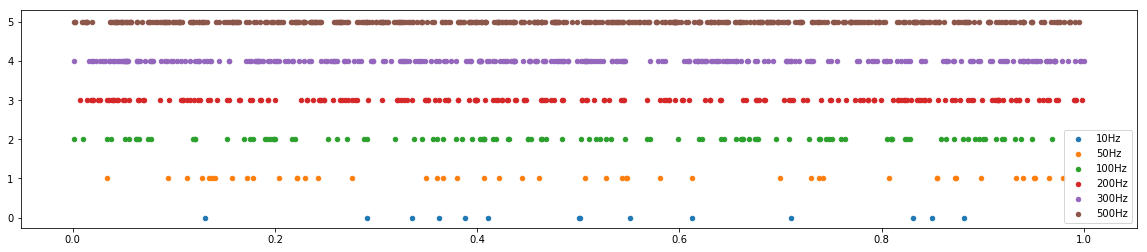

In [324]:
time = 1

plt.figure(figsize=(20,4))
for i,rate in enumerate([10,50,100,200,300,500]):
    spikes = spk.generate_poisson_spikes(rate,1).get_spikes_non_empty()
    plt.scatter(spikes,i*np.ones(len(spikes)),s=20,label='%dHz'%rate)
    plt.legend()

## Spykeutils can generate modulated (inhomogeneous) poisson

### Like ramp cells

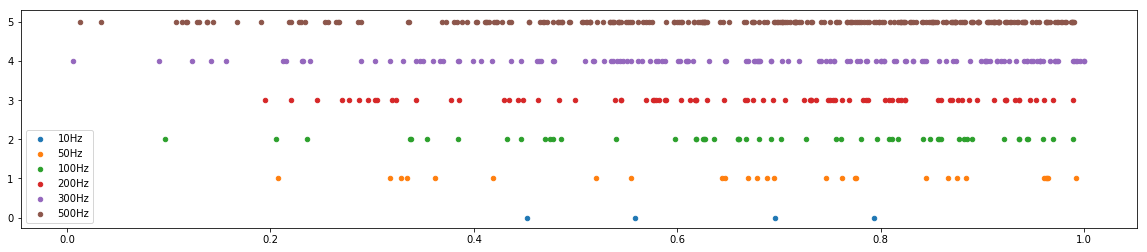

In [329]:
time = 1*q.s

plt.figure(figsize=(20,4))
for i,rate in enumerate([10,50,100,200,300,500]):
    modulation = lambda t: .01*q.s + t
    spikes = np.array(stg.gen_inhomogeneous_poisson(modulation,t_stop=time,max_rate=rate*q.Hz))
    plt.scatter(spikes,i*np.ones(len(spikes)),s=20,label='%dHz'%rate)
    plt.legend()

### Or time cells

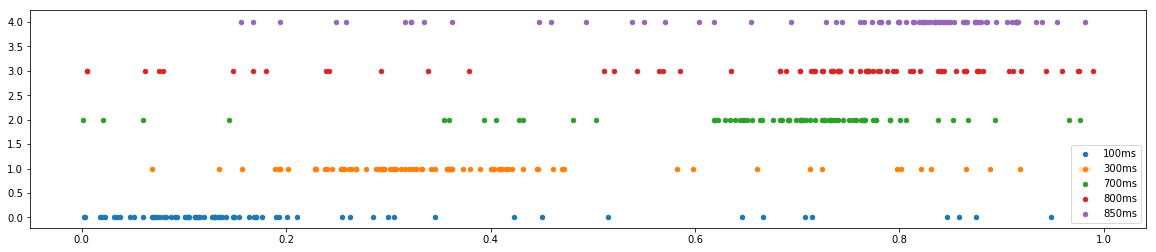

In [369]:
import scipy.stats as st
time = 1*q.s

plt.figure(figsize=(20,4))
for i,timefire in enumerate([.1,.3,.7,.8,.85]):
    modulation = lambda t: .06 + st.norm(timefire,.06).pdf(t)/10
    spikes = np.array(stg.gen_inhomogeneous_poisson(modulation,t_stop=time,max_rate=rate*q.Hz))
    plt.scatter(spikes,i*np.ones(len(spikes)),s=20,label='%dms'%(1000*timefire))
    plt.legend(loc='lower right')

# Full dataset

In [370]:
from spikeHelper.loadSpike import Rat

In [372]:
def genCorr()

(29, 111, 1192)